we will use the popular package skimage to preprocess and augment an image before sending it to a neural network coded in Keras.

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Embedding, Activation, MaxPooling2D, Dropout
from keras.layers import Flatten, LSTM, ZeroPadding2D, BatchNormalization, MaxPooling2D

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/pedro/miniconda3/envs/deep-learning-specialization/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/miniconda3/envs/deep-learning-specialization/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/miniconda3/envs/deep-learning-specialization/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np

Use skimage to load your iguana.jpg and display it in your notebook.

image shape = (170, 170, 3)


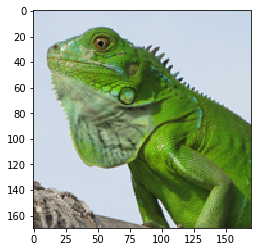

In [2]:
from skimage.measure import compare_ssim as ssim
from skimage import io
from skimage.transform import resize

# Loading the image
image_original = io.imread('green_iguana.jpg')
print("image shape = " + str(image_original.shape))
plt.imshow(image_original)

Use skimage to zoom on the face of the iguana. Display the image.

/home/pedro/miniconda3/envs/deep-learning-specialization/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


image shape = (170, 170, 3)


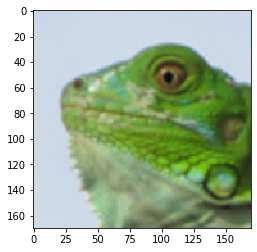

In [3]:
from skimage.transform import rescale

# Zoom image
image_height, image_width, image_channel = image_original.shape
image_zoom = rescale(image_original, 2)[:image_height,:image_width,:]
print("image shape = " + str(image_zoom.shape))
plt.imshow(image_zoom)

Use skimage to rescale the image to 50% of the initial size of the image. Display the image. Rescaling means lowering the resolution of the image. Remember that in class we talked about finding the computation/accuracy trade-off by showing different resolutions of the same image to humans and figuring out what is the minimum resolution leading to the maximum human accuracy.

image shape = (85, 85, 3)


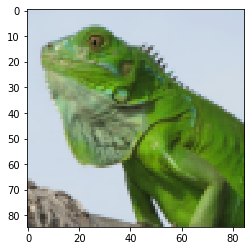

In [4]:
from skimage.transform import rescale

# Rescale image to 50% of the initial size
image_rescaled = rescale(image_original, scale=0.5)
print("image shape = " + str(image_rescaled.shape))
plt.imshow(image_rescaled)

image shape = (128, 128, 3)


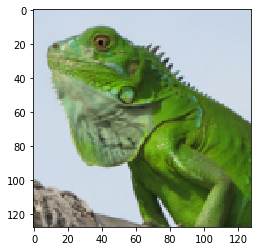

In [6]:
from skimage.transform import resize

# Rescale image to 50% of the initial size
image_resize = resize(image_original, (128, 128))
print("image shape = " + str(image_resize.shape))
plt.imshow(image_resize)

Use skimage to add random noise to the image. Display the image.

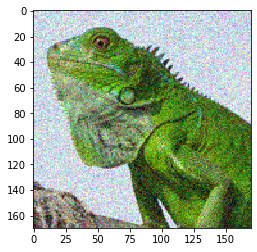

In [7]:
from skimage.util import random_noise

# random noise
image_noise = random_noise(image_original)
plt.imshow(image_noise)

Use skimage to rotate the image by 45 degrees.

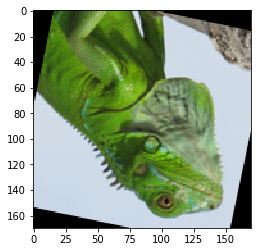

In [8]:
from skimage.transform import rotate
import random

# anticlockwise rotation
def anticlockwise_rotation(image):
    angle = random.randint(0,180)
    return rotate(image, angle)

plt.imshow(anticlockwise_rotation(image_original))

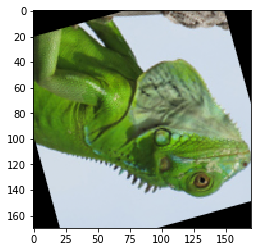

In [9]:
from skimage.transform import rotate
import random

# clockwise rotation
def clockwise_rotation(image):
    angle = random.randint(0,180)
    return rotate(image, -angle)

plt.imshow(clockwise_rotation(image_original))

Use skimage to flip the image horizontaly and verticaly. Display the image.

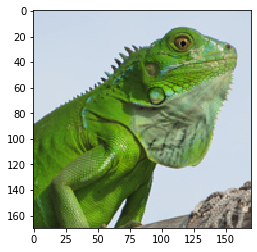

In [10]:
# Horizontal flip
def horizontal_flip(image):
    return  np.fliplr(image)

plt.imshow(horizontal_flip(image_original))

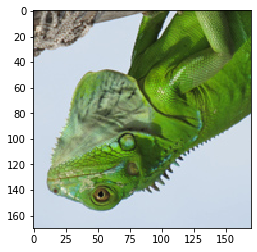

In [11]:
# Vertical flip
def vertical_flip(image):
    return np.flipud(image)

plt.imshow(vertical_flip(image_original))

Use skimage to (i) blur the image, (ii) enhance its contrast, (iii) convert to grayscale, (iv) invert colors…

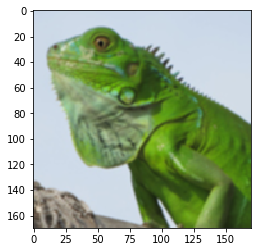

In [21]:
import cv2

# Blur image
image_blur = cv2.GaussianBlur(image_original, (3,3), 0)
plt.imshow(image_blur)

image shape = (170, 170)


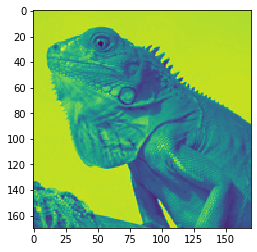

In [22]:
from skimage.color import rgb2gray

# Convert to grayscale

image_gray = rgb2gray(image_original)
print("image shape = " + str(image_gray.shape))
plt.imshow(image_gray)

In [23]:
# Enhance contrast


In [24]:
# Color inversion


Skimage is a popular package for customized data preprocessing and augmentation. However, deep learning frameworks such as Keras often incorporate functions to help you preprocess data in a few lines of code.

Read and run the Keras code for image preprocessing. It will save augmented images in a folder called preview on the notebook’s directory.

In [26]:
# Image preprocessing in Keras

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('green_iguana.jpg')  # this is a PIL image
x = img_to_array(img)  # convert image to numpy array 
x = x.reshape((1,) + x.shape)  # reshape image to (1, ..,..,..) to fit keras' standard shape

# Use flow() to apply data augmentation randomly according to the datagenerator
# and saves the results to the `preview/` directory
num_image_generated = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='iguana', save_format='jpeg'):
    num_image_generated += 1
    if num_image_generated >= 20:
        break # stop the loop after num_image_generated iterations

Train the CNN coded for you in the notebook (See Appendix below) on any of the pictures you created. Evaluate the model.

In [27]:
# CNN
model_CNN = Sequential()
model_CNN.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = image_original.shape))
model_CNN.add(BatchNormalization(axis = 3, name = 'bn0'))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D((2, 2), name='max_pool'))
model_CNN.add(Flatten())
model_CNN.add(Dense(1, activation='sigmoid', name='fc'))

In [28]:
image_heigth = image_original.shape[0]
image_width = image_original.shape[1]
image_channel = image_original.shape[2]

In [29]:
import os

images = [] # to store paths of images from folder

for im in os.listdir('preview'):  # read image name from folder and append its path into "images" array     
    if str(im).endswith('jpeg'):
        images.append(os.path.join('preview',im))

In [30]:
image_inputs = np.ndarray((len(images), image_heigth, image_width, image_channel))
image_inputs.shape

(20, 170, 170, 3)

In [31]:
for i, image in enumerate(images):
    if str(image).endswith('jpeg'):
        image_input = io.imread(image)
        image_inputs[i,:,:,:] = image_input

In [32]:
image_inputs.shape

(20, 170, 170, 3)

In [33]:
X = image_inputs
Y = np.ones((len(images),1))

In [34]:
X.shape

(20, 170, 170, 3)

In [35]:
Y.shape

(20, 1)

In [37]:
# training code for CNN
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_CNN.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_CNN.fit(X, Y, epochs=2)

Epoch 1/2
20/20 [==============================] - 0s 19ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 2/2
20/20 [==============================] - 0s 7ms/step - loss: 1.1921e-07 - acc: 1.0000


In [38]:
# testing code for CNN
model_CNN.predict(np.expand_dims(image_blur, axis=0))

array([[1.]], dtype=float32)